# Titanic - Machine Learning from Disaster
### Predict survival on the Titanic and get familiar with ML basics

---------------------

* Kaggle 링크 : https://www.kaggle.com/competitions/titanic/data <br/>
* 데이터 분석 : https://greencloud.tistory.com/64

## Step1. 데이터 탐색

### 1) Data Dictionary

|Variable|Definition|Key|Comment|
|:-------|:---------|:--|:------|
|PassengerId||||
|survived|Survival  |0=No, 1=Yes||
|pclass  |Ticket class|1=1st, 2=2nd, 3=3rd|A proxy for socio-economic status(SES) <br/> 1st=Upper, 2nd=Middle, 3rd=Loser|
|Name|Name|||
|Sex|Sex| | |
|Age|Age in years||Age is fractional if less than 1. If the age is estimated, is it in the from of xx.5|
|Sibsp|# of siblings/spouses aboard the Titanic||The dataset defines family relations in this way <br/> Siblind=brother, sister, stepbrother, stepsister <br/> Spouse=husband, wife (mistresses and fiances were ignored)|
|Parch|# of parents/children aboard the Titanic||The dataset defines family relations in this way <br/> Parent=mother, father <br/> Child=daughter, son, stepdaughter, stepson <br/> Some children travelled only with a nanny, therefore parch=0 for them.|
|Ticket|Ticket number|||
|Fare|Passenger fare|||
|Cabin|Cabin number|||
|Embarked|Port of Embarkation|C=Cherbourg, Q=Queenstown, S=Southampton||

### 2) Importing important libraries

In [1]:
# data analysis libraries
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

### 3) Reading the dataset

In [2]:
# "PassengerId" column을 index로 지정하여 train.csv 데이터를 읽음.
train = pd.read_csv("C:/Users/hd00m/Python/Data_Kaggle/titanic/train.csv", index_col="PassengerId")

In [3]:
# 데이터 행렬 사이즈
print(train.shape)
print(train.info())

(891, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None


891명, 변수 11개 (PassengerId는 index이므로 변수에 포함되지 않음.) <br>
연속형 변수 : Age, Fare <br>
범주형 변수 : Survived, Pclass, Sex, SibSp, Parch, Embarked

In [4]:
# 데이터의 상위 5개
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Object 변수 통계치
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# int, float 변수 통계치
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


생존율 : 38.4% (Survived의 mean=0.383838)

In [7]:
# 결측 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

* 나이는 생존 여부와 연관이 있을 것 + 결측치가 많음 = 대체할 방법을 생각. <br>

* cabin(객실 번호)는 생존 여부와 연관이 있을지..? + 결측치가 많음 = 대체 여부 보류
(배의 위치에 따라 생존 여부가 다를 것으로 생각. 객실 번호는 배의 위치에 따라 부여된 다고 생각.)

## Step2. Exploratory Data Analysis(EDA)

### 1) Data Visualization

> Survival

In [8]:
# 생존여부 label
# 0 = 사망, 1 = 생존
train['Survived_C'] = train['Survived'].replace(0, 'Perish').replace(1, "Survived")
train[['Survived','Survived_C']].head()

,Survived,Survived_C
PassengerId,,
1,0,Perish
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Perish


In [9]:
print(train['Survived_C'].value_counts())

Perish      549
Survived    342
Name: Survived_C, dtype: int64


In [10]:
#train['Survived'].value_counts().plot.bar()

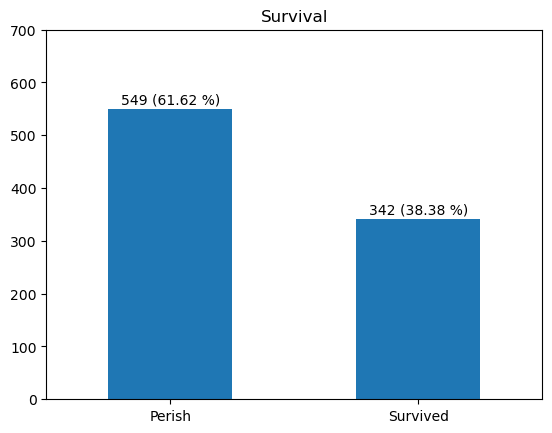

In [11]:
ax = train['Survived_C'].value_counts().plot(kind='bar', title="Survival", rot=0)
plt.ylim(0, 700)

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%d (%.2f %%)"%(height, height/891*100), (left+width/2, height+10), ha='center')

사망 : 549명, 61% <br>
생존 : 342명, 38%

> Age & Survival

In [12]:
# 연령 범주화1
# Child : 0세~19세 이상, Audlt : 20세~40세 이상, Senior : 41세~60세 이상, Old : 61세 이상
train['Age_C1'] = pd.cut(train["Age"], bins=[0, 19, 40, 60, 9999], labels=['Child', 'Audlt', 'Senior', 'Old'])
train[['Age','Age_C1']].tail()

,Age,Age_C1
PassengerId,,
887,27.0,Audlt
888,19.0,Child
889,NaN,NaN
890,26.0,Audlt
891,32.0,Audlt


코딩이 잘됐는지 확인.

In [13]:
train.loc[(train['Age'] == 20) | (train['Age'] == 19) | (train['Age'] == 40)  | (train['Age'] == 41), ['Age', 'Age_C1']].head(20)

,Age,Age_C1
PassengerId,,
13,20.0,Audlt
28,19.0,Child
31,40.0,Audlt
41,40.0,Audlt
45,19.0,Child
68,19.0,Child
92,20.0,Audlt
114,20.0,Audlt
132,20.0,Audlt


In [14]:
train.groupby('Age_C1')['Age'].count()
#train['Age_C'].value_counts()

Age_C1
Child     164
Audlt     400
Senior    128
Old        22
Name: Age, dtype: int64

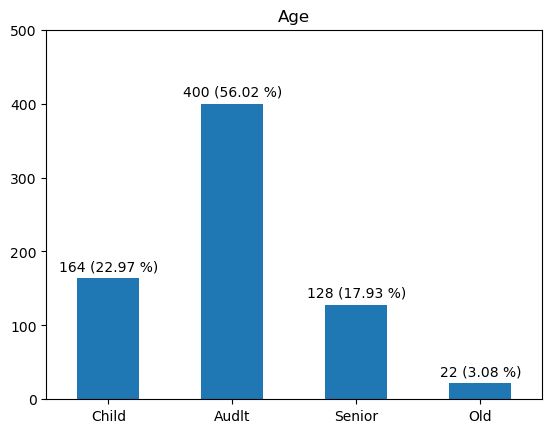

In [15]:
ax = train.groupby('Age_C1')['Age'].count().plot(kind='bar', title="Age", rot=0)
plt.ylim(0, 500)
plt.xlabel('')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%d (%.2f %%)"%(height, height/714*100), (left+width/2, height+10), ha='center')

Child : 164명, 23% <br>
Audit : 400명, 56% <br>
Senior : 128명, 18% <br>
Old : 22명, 3% 

In [16]:
# 열을 생존 여부로 나눔
train_sur = train.loc[train['Survived'] ==1, :]
train_per = train.loc[train['Survived'] ==0, :]
train_sur['Age_C1'].value_counts()
train_per['Age_C1'].value_counts()

Audlt     244
Child      85
Senior     78
Old        17
Name: Age_C1, dtype: int64

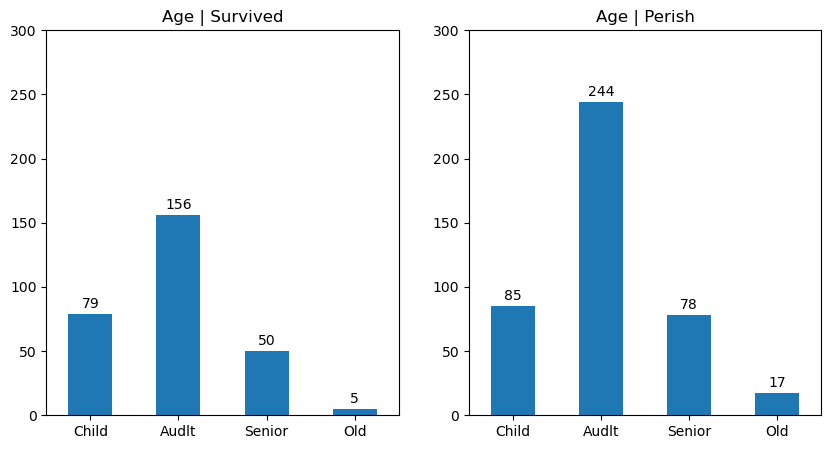

In [17]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) 
ax = train_sur.groupby('Age_C1')['Age'].count().plot(kind='bar', title="Age | Survived", rot=0)
plt.ylim(0, 300)
plt.xlabel('')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height+5), ha='center', size=10)



plt.subplot(1, 2, 2) 
ax = train_per.groupby('Age_C1')['Age'].count().plot(kind='bar', title="Age | Perish", rot=0)
plt.ylim(0, 300)
plt.xlabel('')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height+5), ha='center', size=10)



In [18]:
# 연령 범주화2
# Group1 : 0세~10세 이상, Group2 : 11세~20세 이상 ...
train['Age_C2'] = pd.cut(train["Age"], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 9999], labels=['Group0', 'Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6', 'Group7', 'Group8'])
train[['Age','Age_C2']].tail()

,Age,Age_C2
PassengerId,,
887,27.0,Group2
888,19.0,Group1
889,NaN,NaN
890,26.0,Group2
891,32.0,Group3


In [19]:
train.groupby('Age_C2')['Age'].count()

Age_C2
Group0     64
Group1    115
Group2    230
Group3    155
Group4     86
Group5     42
Group6     17
Group7      5
Group8      0
Name: Age, dtype: int64

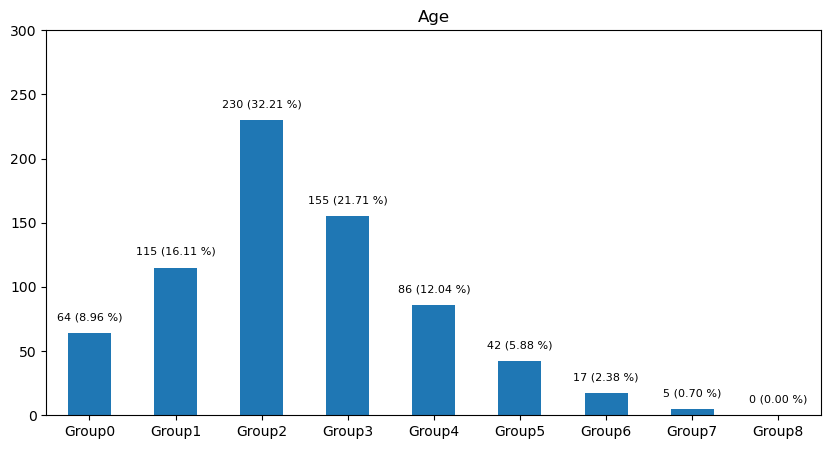

In [20]:
plt.figure(figsize=(10, 5))
ax = train.groupby('Age_C2')['Age'].count().plot(kind='bar', title="Age", rot=0)
plt.ylim(0, 300)
plt.xlabel('')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%d (%.2f %%)"%(height, height/714*100), (left+width/2, height+10), ha='center', size=8)

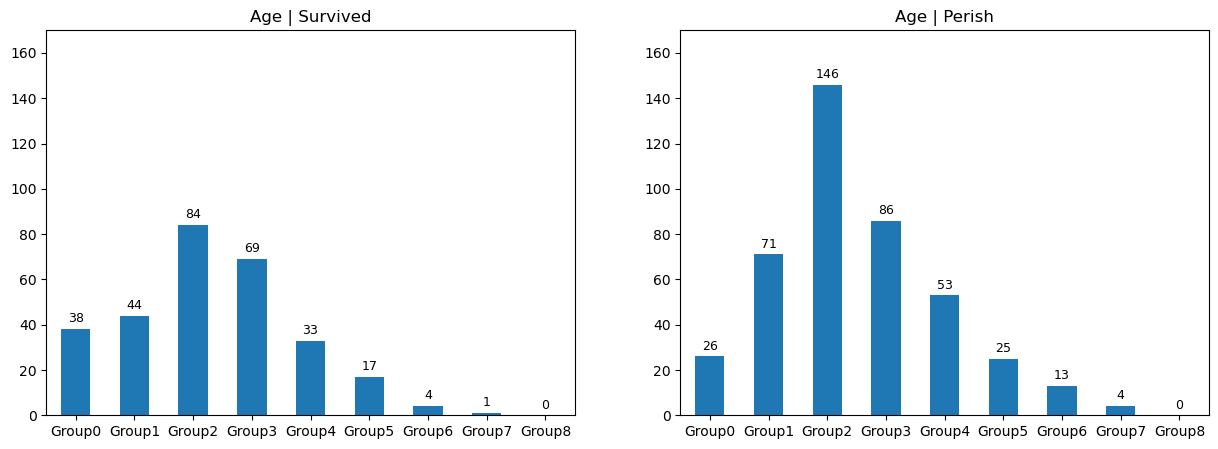

In [21]:
# 열을 생존 여부로 나눔
train_sur = train.loc[train['Survived'] ==1, :]
train_per = train.loc[train['Survived'] ==0, :]
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1) 
ax = train_sur.groupby('Age_C2')['Age'].count().plot(kind='bar', title="Age | Survived", rot=0)
plt.ylim(0, 170)
plt.xlabel('')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height+3), ha='center', size=9)



plt.subplot(1, 2, 2) 
ax = train_per.groupby('Age_C2')['Age'].count().plot(kind='bar', title="Age | Perish", rot=0)
plt.ylim(0, 170)
plt.xlabel('')

for p in ax.patches:
    left, bottom, width, height=p.get_bbox().bounds
    ax.annotate("%d"%(height), (left+width/2, height+3), ha='center', size=9)



<AxesSubplot:xlabel='Age_C2', ylabel='count'>

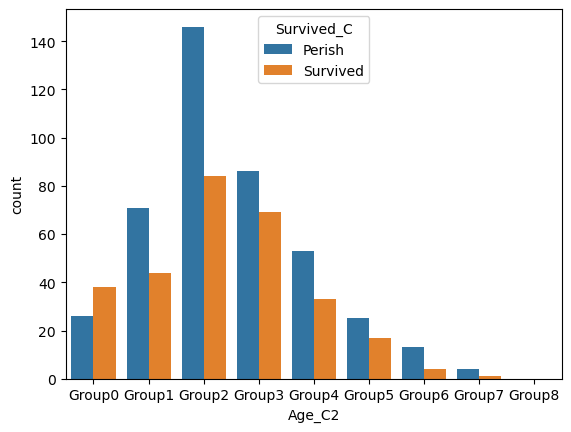

In [22]:
sns.countplot(data=train, x='Age_C2', hue='Survived_C')

> 10대 이하와 70대 이상은 사망한 대상자보다 생존한 대상자가 더 많음. <br>
> 20대는 생존한 대상자의 1.7배 사망함. 